In [ ]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
(X_train,y_train),(X_test,y_test)=cifar100.load_data()
X=X_test


169017344/169001437 [==============================] - 6s 0us/step


In [ ]:
names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle','bicycle',
     'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel','can',
     'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster','house', 
    'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose','sea', 
    'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm' ]
          

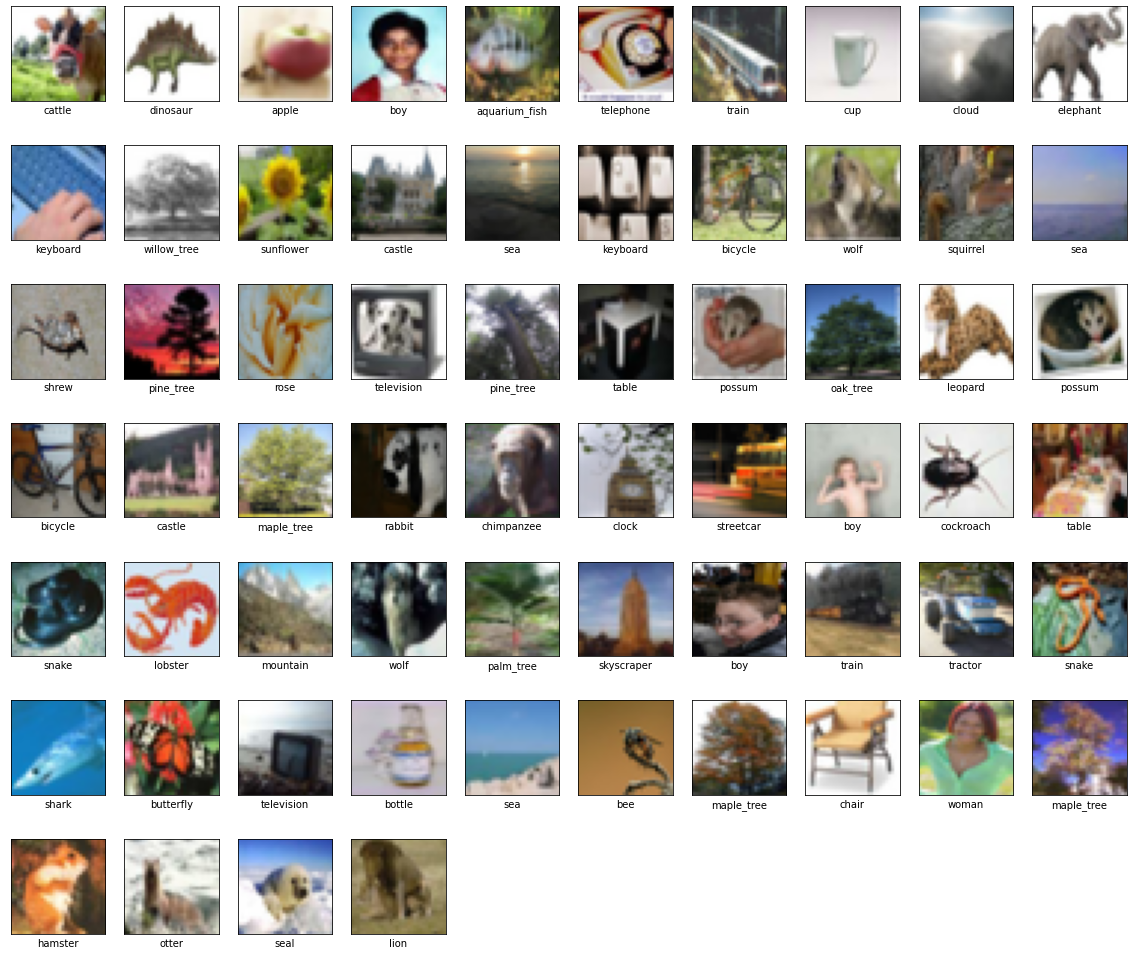

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
plt.figure(figsize=(20,20))
for i in range(64):
  plt.subplot(8,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])     
  yt=y_train[i]
  plt.xlabel(names[(yt[0])])
plt.show()

print(X_train.shape)
X = X_test
print(X_test.shape)
print(y_test.shape)

In [ ]:
X_train =X_train.reshape(50000,3072)
X_test = X_test.reshape(10000,3072)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255
X_test/=255
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,100)    # 10 lớp
y_test=to_categorical(y_test,100)
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
model = Sequential()
model.add(Dense(1024,activation='relu',input_shape=(3072,)))
#model.add(Dropout(0.2))
model.add(Dense(724,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(100,activation="softmax"))
model.summary()
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

# verbose=1 cho thấy tiến trình, còn 0 thì không thấy
#Batch size: số lượng dữ liệu Mini-Batch Gradient Descent sử dụng trong 1 lần để cập nhật tham số
history=model.fit(X_train, y_train, batch_size=128,epochs =30, verbose=1,validation_data=(X_test,y_test)) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 724)               742100    
                                                                 
 dense_2 (Dense)             (None, 512)               371200    
                                                                 
 dense_3 (Dense)             (None, 100)               51300     
                                                                 
Total params: 4,311,352
Trainable params: 4,311,352
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
391/391 [==============================] - 8s 12ms/step - loss: 4.1319 - accuracy: 0.0785 - val_loss: 3.9130 - val_accuracy: 0.1128
Epoch 2/30
391/391 [===============

In [ ]:
# liên kết driver
from google.colab import drive
drive.mount('/content/drive')
# save model
model.save('/content/drive/MyDrive/Colab Notebooks/model_ANN_cifar100.h5')
#model.save_weights('/content/drive/MyDrive/Colab Notebooks/model_CNN_weights_mnist.h5')
from keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/model_ANN_cifar100.h5')

MessageError: ignored

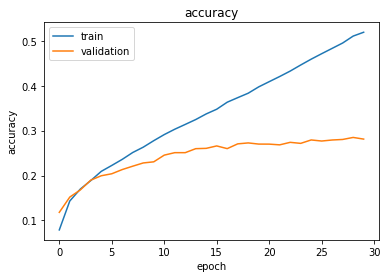

In [ ]:
# biểu đồ biểu thị độ chính xác
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
# độ chính xác
test_loss,test_acc=model.evaluate(X_test,y_test,verbose=0)
print(f'test_acc: {test_acc*100}') 

test_acc: 28.110000491142273


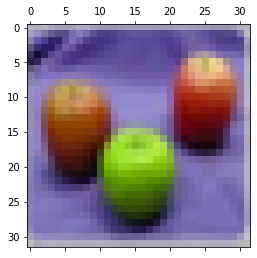

In [ ]:
plt.matshow(X[9
              ])

In [ ]:
import numpy as np
y_predicted = model.predict(X_test)
np.argmax(y_predicted[9])

10

In [ ]:
y_predicted_labels= [np.argmax(i) for i in y_predicted]
y_predicted_labels[:15]

[49, 80, 15, 57, 71, 43, 63, 7, 23, 10, 87, 93, 58, 69, 40]

# model ngoài

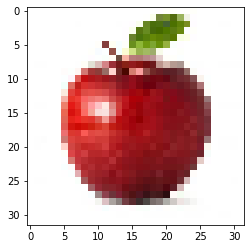

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img=load_img('tao.jpeg',target_size=(32,32,3))
plt.imshow(img)

In [ ]:
img=img_to_array(img)  # tạo mảng
#img = img[:,:,0]  #hinh test là 3 màu RGB, nhưng tâp train là 1 màu xám
img=img.reshape(1, 3072,)
img=img.astype('float32')
img=img/255
import numpy as np
np.argmax(model.predict(img),axis=1)

array([0])